# Haar Wavelet


In [2]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math

In [3]:
image = cv2.imread('/home/juanca632/PersonalProjects/stage/wavelet-transform/image_gray.jpg', cv2.IMREAD_GRAYSCALE)

/tmp/ipykernel_440/1402693144.py:8: RuntimeWarning: overflow encountered in scalar add
  average = (matrix[i, j] + matrix[i, j+1] + matrix[i+1, j] + matrix[i+1, j+1]) / 4


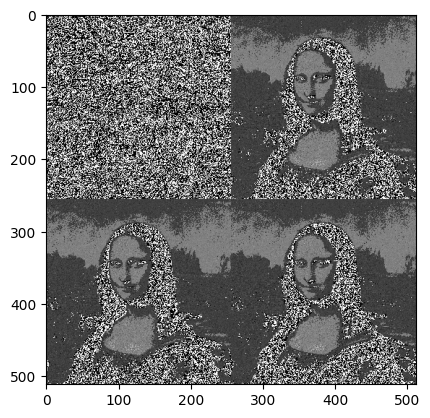

In [4]:
def haar_wavelet_transform(matrix):
    n = matrix.shape[0]
    transformed_matrix = np.copy(matrix)

    while n >= 2:
        for i in range(0, n, 2):
            for j in range(0, n, 2):
                average = (matrix[i, j] + matrix[i, j+1] + matrix[i+1, j] + matrix[i+1, j+1]) / 4
                transformed_matrix[i//2, j//2] = average

                diff1 = matrix[i, j] - average
                diff2 = matrix[i, j+1] - average
                diff3 = matrix[i+1, j] - average
                diff4 = matrix[i+1, j+1] - average

                transformed_matrix[i//2 + n//2, j//2] = diff1
                transformed_matrix[i//2, j//2 + n//2] = diff2
                transformed_matrix[i//2 + n//2, j//2 + n//2] = diff3
                transformed_matrix[i//2 + n//2, j//2 + n//2] = diff4

        matrix = np.copy(transformed_matrix)
        n //= 2

    return transformed_matrix

# Ejemplo de matriz 4x4
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])

transformed_matrix = haar_wavelet_transform(image)
plt.imshow(transformed_matrix, cmap="gray")
plt.show()
# print(transformed_matrix)



In [5]:
root2 = math.sqrt(2)

/tmp/ipykernel_440/3121323849.py:13: RuntimeWarning: overflow encountered in scalar subtract
  dif = (matrix[i, j] - matrix[i, j+1]) / root2
/tmp/ipykernel_440/3121323849.py:12: RuntimeWarning: overflow encountered in scalar add
  sum = (matrix[i, j] + matrix[i, j+1]) / root2


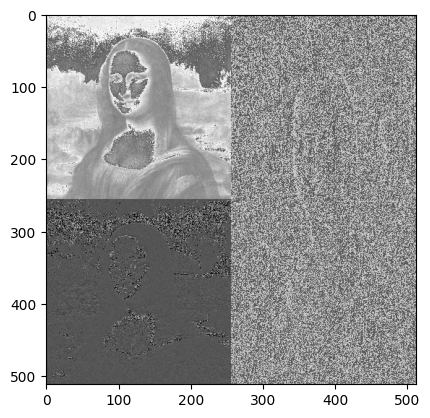

In [33]:
def haar_wavelet_transform(matrix):
    n = int(matrix.shape[0])
    n_half = int(n /2)
    transformed_matrix = np.zeros((n,n))

    if(n >= 2):
        for i in range(0, n):
            aux = 0
            aux2 = int(n_half + aux)
            for j in range(0, n, 2):

                sum = (matrix[i, j] + matrix[i, j+1]) / root2
                dif = (matrix[i, j] - matrix[i, j+1]) / root2
                transformed_matrix[i,aux] = sum
                transformed_matrix[i,aux2] = dif
                aux = aux + 1
                aux2 = aux2 + 1
        transformed_matrix2 = np.copy(transformed_matrix)
        for j in range(0, n_half):
            aux = 0
            aux2 = int(n_half + aux)
            for i in range(0, n, 2):

                sum = (transformed_matrix[i, j] + transformed_matrix[i+1, j]) / root2
                dif = (transformed_matrix[i, j] - transformed_matrix[i+1, j]) / root2

                transformed_matrix2[aux,j] = sum
                transformed_matrix2[aux2,j] = dif
                aux = aux + 1
                aux2 = aux2 + 1

    # Obtener la matriz n/2 x n/2 correspondiente a la esquina superior izquierda
    new_matrix = transformed_matrix2


    return new_matrix, n_half,n

# Ejemplo de matriz 4x4
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])

transformed_matrix, n_half,n = haar_wavelet_transform(image)

print("\n")
# print(transformed_matrix)
plt.imshow(transformed_matrix,  cmap="gray")
plt.show()



In [10]:
import cv2
import numpy as np

def apply_haar_wavelet(matrix):
    n = matrix.shape[0]
    transformed_matrix = matrix.copy()

    while n >= 2:
        for i in range(0, n, 2):
            for j in range(0, n, 2):
                avg = (transformed_matrix[i, j] + transformed_matrix[i, j+1] +
                       transformed_matrix[i+1, j] + transformed_matrix[i+1, j+1]) / 4.0
                diff = (transformed_matrix[i, j] - transformed_matrix[i, j+1] +
                        transformed_matrix[i+1, j] - transformed_matrix[i+1, j+1]) / 2.0
                transformed_matrix[i//2, j//2] = avg
                transformed_matrix[(i+n)//2, j//2] = diff
                transformed_matrix[i//2, (j+n)//2] = (transformed_matrix[i, j] -
                                                       transformed_matrix[i, j+1] -
                                                       transformed_matrix[i+1, j] +
                                                       transformed_matrix[i+1, j+1]) / 2.0
                transformed_matrix[(i+n)//2, (j+n)//2] = (transformed_matrix[i, j] +
                                                           transformed_matrix[i, j+1] -
                                                           transformed_matrix[i+1, j] -
                                                           transformed_matrix[i+1, j+1]) / 2.0
        n //= 2

    return transformed_matrix

# Aplicar la transformada Haar wavelet a la imagen
transformed_image = apply_haar_wavelet(image)

# Ajustar la interpretación de los coeficientes y detalles para visualización
transformed_image = np.abs(transformed_image)  # Tomar el valor absoluto para obtener magnitudes positivas
transformed_image *= 255 / np.max(transformed_image)  # Ajustar la escala a 0-255

# Mostrar la imagen original y la transformada
plt.imshow('Imagen original', image)
plt.imshow('Transformada Haar wavelet', transformed_image.astype(np.uint8))
plt.show()


/tmp/ipykernel_440/3932501325.py:11: RuntimeWarning: overflow encountered in scalar add
  avg = (transformed_matrix[i, j] + transformed_matrix[i, j+1] +
/tmp/ipykernel_440/3932501325.py:13: RuntimeWarning: overflow encountered in scalar subtract
  diff = (transformed_matrix[i, j] - transformed_matrix[i, j+1] +
/tmp/ipykernel_440/3932501325.py:13: RuntimeWarning: overflow encountered in scalar add
  diff = (transformed_matrix[i, j] - transformed_matrix[i, j+1] +
/tmp/ipykernel_440/3932501325.py:17: RuntimeWarning: overflow encountered in scalar subtract
  transformed_matrix[i//2, (j+n)//2] = (transformed_matrix[i, j] -
/tmp/ipykernel_440/3932501325.py:21: RuntimeWarning: overflow encountered in scalar subtract
  transformed_matrix[(i+n)//2, (j+n)//2] = (transformed_matrix[i, j] +
/tmp/ipykernel_440/3932501325.py:17: RuntimeWarning: overflow encountered in scalar add
  transformed_matrix[i//2, (j+n)//2] = (transformed_matrix[i, j] -
/tmp/ipykernel_440/3932501325.py:21: RuntimeWarning: ov

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'